# Convolutional Neural Networks: Application

Welcome to Course 4's second assignment! In this notebook, you will:

- Implement helper functions that you will use when implementing a TensorFlow model
- Implement a fully functioning ConvNet using TensorFlow 

**After this assignment you will be able to:**

- Build and train a ConvNet in TensorFlow for a classification problem 

We assume here that you are already familiar with TensorFlow. If you are not, please refer the *TensorFlow Tutorial* of the third week of Course 2 ("*Improving deep neural networks*").

### <font color='darkblue'> Updates to Assignment <font>

#### If you were working on a previous version
* The current notebook filename is version "1a". 
* You can find your work in the file directory as version "1".
* To view the file directory, go to the menu "File->Open", and this will open a new tab that shows the file directory.

#### List of Updates
* `initialize_parameters`: added details about tf.get_variable, `eval`. Clarified test case.
* Added explanations for the kernel (filter) stride values, max pooling, and flatten functions.
* Added details about softmax cross entropy with logits.
* Added instructions for creating the Adam Optimizer.
* Added explanation of how to evaluate tensors (optimizer and cost).
* `forward_propagation`: clarified instructions, use "F" to store "flatten" layer.
* Updated print statements and 'expected output' for easier visual comparisons.
* Many thanks to Kevin P. Brown (mentor for the deep learning specialization) for his suggestions on the assignments in this course!

## 1.0 - TensorFlow model

In the previous assignment, you built helper functions using numpy to understand the mechanics behind convolutional neural networks. Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. 

As usual, we will start by loading in the packages. 

In [5]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow import keras
#from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

Run the next cell to load the "SIGNS" dataset you are going to use.

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


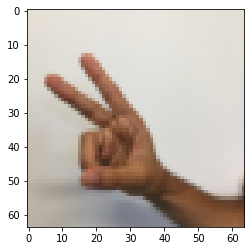

In [3]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In Course 2, you had built a fully-connected network for this dataset. But since this is an image dataset, it is more natural to apply a ConvNet to it.

To get started, let's examine the shapes of your data. 

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


** Expected Output:**

```
W1[1,1,1] = 
[ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W1.shape: (4, 4, 3, 8)


W2[1,1,1] = 
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W2.shape: (2, 2, 8, 16)
```

In [23]:
# GRADED FUNCTION: forward_propagation

m, h, w, c = X_train.shape
### START CODE HERE ###
# CONV2D: stride of 1, padding 'SAME'
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (h, w, c)),
    keras.layers.MaxPool2D((8, 8), strides = (8, 8), padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D((4, 4), strides = (4, 4), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(6)

])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_13 (Dense)             (None, 6)                

In [25]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 15, validation_data = (X_test, Y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/15
1080/1080 [==============================] - 2s 1ms/sample - loss: 0.5274 - accuracy: 0.8306 - val_loss: 0.5903 - val_accuracy: 0.8000
Epoch 2/15
1080/1080 [==============================] - 1s 977us/sample - loss: 0.4690 - accuracy: 0.8583 - val_loss: 0.5552 - val_accuracy: 0.8083
Epoch 3/15
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.4061 - accuracy: 0.8852 - val_loss: 0.5219 - val_accuracy: 0.8083
Epoch 4/15
1080/1080 [==============================] - 1s 925us/sample - loss: 0.4075 - accuracy: 0.8750 - val_loss: 0.4933 - val_accuracy: 0.7917
Epoch 5/15
1080/1080 [==============================] - 1s 860us/sample - loss: 0.3535 - accuracy: 0.9046 - val_loss: 0.4520 - val_accuracy: 0.8500
Epoch 6/15
1080/1080 [==============================] - 1s 855us/sample - loss: 0.3451 - accuracy: 0.8917 - val_loss: 0.4015 - val_accuracy: 0.8667
Epoch 7/15
1080/1080 [==============================] - 1s 918us/samp

Congratulations! You have finished the assignment and built a model that recognizes SIGN language with almost 80% accuracy on the test set. If you wish, feel free to play around with this dataset further. You can actually improve its accuracy by spending more time tuning the hyperparameters, or using regularization (as this model clearly has a high variance). 

Once again, here's a thumbs up for your work! 

In [ ]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)